# Discrete Uniform Distribution

## Definition

```{prf:definition} Discrete Uniform Distribution
:label: def:discrete_uniform

Let $X$ be a **discrete random variable** that follows a Uniform distribution over the set $\S$.
This means that $X=x$ has an equally likely chance of being drawn.

Then the probability mass function (PMF) of $X$ is given by 

$$
\P(X=x) = \dfrac{1}{\lvert \S \rvert}
$$

Note:

1. It is non-parametric because there is no parameters associated.
```

## Utilities

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import random

# mostly deprecation warnings.
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

We will also use NumPy to create various input ranges and Matplotlib to visualize various functions:

In [74]:
%matplotlib inline

In [75]:
random.seed(42)
np.random.seed(42)

In [2]:
# create a true population of 1000 people with equal heights across 1-10cm
true_population = np.arange(1, 11, 1).repeat(100)

Both are the same but it is to differentiate between true and empirical.

In [3]:
def true_pmf(x: float, population: np.ndarray) -> float:
    """PMF of the true population: map X(\S) to a probability.
    
    Note:
        The PMF is completely determined if we know the true distribution.
    """
    return np.sum(population == x) / len(population)

def empirical_pmf(x: float, sample: np.ndarray):
    """Empirical distribution of the sample."""
    return np.sum(sample == x) / len(sample)

# def empirical_distribution(sample: np.ndarray):
#     """Empirical distribution of the sample."""
#     return np.cumsum(np.bincount(sample)) / len(sample)

In [5]:
# 1. What is the probability of selecting a person of height 1cm?
print(f"P(X=1) = {true_pmf(1, true_population)}")

P(X=1) = 0.1


## The Setup

Let the true population be defined as a total of $1000$ people. We imagine that this is all the 
people in the world.

Amongst the 1000 people, 100 people is of height 1cm, 100 people is of height 2cm, 100 people is of height 3cm, 
this holds true for all heights from 1cm to 10cm. We will assume that there are only 10 distinct heights
that people can be. Thus, this is a **discrete** distribution.

Let the experiment be a triplet $\pspace$, this experiment is the action of ***randomly selecting***
a person from the true population.

Since our problem is about the height of the person, it is reasonable to define our **sample space**
to be $\Omega = \{1,2,3,4,5,6,7,8,9,10\}$, where each element of the sample space is the **outcome** of the **experiment**.
Note that our sample space is discrete and there are only 10 distinct outcomes.

Now suppose I want to answer a few simple questions about the experiment. For example, I want to know

1. What is the probability of selecting a person of height 1cm?
2. What is the probability of selecting a person that is taller than 5cm (i.e. height 6cm, 7cm, 8cm, 9cm, 10cm)?
3. What is the mean height of the true population (expected value)?

With that, we will need to define a random variable $X$ and let $X$ be the height of a **randomly** selected person from the **true population**.

In {prf:ref}`random_variables`, $X$ is a function $X: \Omega \rightarrow \mathbb{R}$ which
maps an outcome $\xi \in \S$ to a real number $X(\xi) \in \R$. This is needed if your outcomes are not
numerical. We first check if there is a need to 
define a new mapping from $\Omega$ to $\mathbb{R}$. It turns out that we can just use the identity mapping
since the sample space $\Omega$ is already a subset of $\mathbb{R}$, and are just numbers. With that, 
$X(\S)$ is $\{1,2,3,4,5,6,7,8,9,10\}$.

With $X(\S)$ defined, the ***state space*** (the range) is defined as per {prf:ref}`def_state_space`, we can associate each state
$x \in X(\S)$ with a probability $P(X = x)$. This is the ***probability mass function*** (PMF) of $X$.

We can plot an ideal histogram to see the distribution of how the height of each person in the true population is distributed.

We call this an **ideal histogram** because we know the true population, and we are plotting every single person's height in this true population.

In [6]:
def plot_true_pmf(population: np.ndarray):
    """Plots the PMF of the true population."""
    bins = np.arange(1, population.max() + 1.5) - 0.5
    fig, ax = plt.subplots()
    _ = ax.hist(
        population,
        bins,
        density=True,
        color="#0504AA",
        alpha=0.5,
        edgecolor="black",
        linewidth=2,
    )
    _ = ax.stem(
        population,
        [true_pmf(x, population) for x in population],
        linefmt="C3-",
        markerfmt="C3o",
        basefmt="C3-",
        use_line_collection=True,
    )

    _ = ax.set_xlabel("Height (cm)")
    _ = ax.set_ylabel("Probability")
    _ = ax.set_title("PMF of the true population")
    _ = ax.set_xticks(bins + 0.5)

    return fig, ax

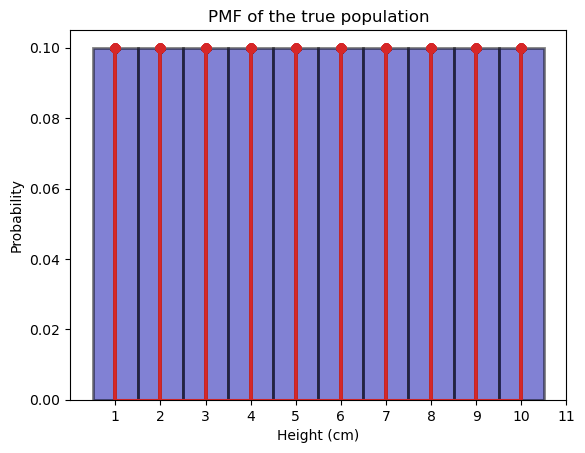

In [7]:
_ = plot_true_pmf(true_population)

The above is the ideal histogram, which is the PMF. More concretely, for each 
state $x \in X(\S)$, the probability of $X$ being $x$ is $P(X = x) = 1/10$.

$$
\begin{align}
\P(X=x) = \begin{cases}
\frac{1}{10} \text{ if } x=1 \\
\frac{1}{10} \text{ if } x=2 \\
\frac{1}{10} \text{ if } x=3 \\
\vdots \\
\frac{1}{10} \text{ if } x=10 \\
\end{cases}
\end{align}
$$

Now recall that the PMF is a probability distribution and is ***deteministic***. There is 
nothing random about the PMF since we defined it according to the true population. In other words,
the true population, our "universe", has enumerated all the possible states and their probabilities.

With PMF, we can also answer questions 1,2 and 3.

1. $\P(X=1) = \frac{1}{10} = 0.1$
2. $\P(X > 5) = \P(X=6) + \P(X=7) + \P(X=8) + \P(X=9) + \P(X=10) = \frac{5}{10} = 0.5$
3. $\exp \lsq X \rsq = \sum_{x \in X(\S)} x \cdot \P(X=x) = \frac{1}{10} \cdot 1 + \frac{1}{10} \cdot 2 + \frac{1}{10} \cdot 3 + \cdots + \frac{1}{10} \cdot 10 = 5.5$

In [9]:
# 1. What is the probability of selecting a person of height 1cm?
print(f"P(X=1) = {true_pmf(1, true_population)}")

# 2. What is the probability of selecting a person that is taller than 5cm?
print(f"P(X>5) = {true_pmf(6, true_population) + true_pmf(7, true_population) + true_pmf(8, true_population) + true_pmf(9, true_population) + true_pmf(10, true_population)}")

P(X=1) = 0.1
P(X>5) = 0.5


We can also say that $X$ follows a **discrete uniform distribution**, $X \sim U(1,10)$.
This is also true because in probability theory and statistics, 
the discrete uniform distribution is a symmetric probability distribution wherein a finite number of
values are equally likely to be observed; every one of n values has equal probability 1/n.

Now connecting this concept back to {cite}`chan_2021` chapter 3.2.4 on PMF vs empirical histogram. The idea seems
more apparent now.

```{figure} ../assets/generative_vs_inference.PNG
---
name: fig:generative_vs_inference
---
Generative vs Inference, credits to {cite}`chan_2021`
```

Given a PMF and an associated random variable $X$, we can generate a sample of size $n$ from the PMF.
This process is called **synthesis** ***if*** we know the true PMF, then we can generate more data
from the true population to train a model. This part is slightly confusing because if we know 
the true PMF, should we not have all the data in the true population? This is often not true
in the real world as we won't be able to enumerate all the possible states and their probabilities.
What we can do is to assume that the underlying distribution follows a certain distribution (say Gaussian),
then we can generate data from this distribution. This is called **synthesis** and **generative modelling**.
The key here is we are sure of the underlying distribution, and we can generate data from it (**KIV as a bit confused here**).

In contrast, the more common case is that we do not know the true PMF. We only have a sample of size $n$ from
the true population. We are given a dataset by our stakeholders, and then we want to estimate the
PMF. This process is called **estimate/inference**. 
In our current example, this is not very 
obvious because an uniform distribution does not have parameters to estimate 
(i.e. [non-parametric](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)).
But the key here is given a dataset sampled from the true population, we want to first ***propose***
a reasonable ***model/distribution***, and work towards estimating the parameters of this model/distribution.
For example, if we propose a Gaussian distribution, we can estimate the mean and standard deviation with the given 
empirical dataset.

## Ideal Histogram/Distribution (PMF) vs Empirical Histogram/Distribution

But we can still make sense of it with the following example with uniform distribution even if it is non-parametric.

In [10]:
def plot_empirical_pmf(sample: np.ndarray):
    """Plots the empirical histogram of a sample dataset drawn from the population."""
    bins = np.arange(1, sample.max() + 1.5) - 0.5
    fig, ax = plt.subplots()
    _ = ax.hist(
        sample,
        bins,
        density=True,
        color="#0504AA",
        alpha=0.5,
        edgecolor="black",
        linewidth=2,
    )
    _ = ax.stem(
        sample,
        [empirical_pmf(x, sample) for x in sample],
        linefmt="C3-",
        markerfmt="C3o",
        basefmt="C3-",
        use_line_collection=True,
    )

    _ = ax.set_xlabel("Height (cm)")
    _ = ax.set_ylabel("Probability")
    _ = ax.set_title(f"PMF of a sample of size {len(sample)}")
    _ = ax.set_xticks(bins + 0.5)

    return fig, ax

We now define 3 random samples of 100, 500 and 900 people drawn from the true population drawn uniformly at random with no replacement.

In [11]:
sample_100 = np.random.choice(true_population, 100, replace=False)
sample_500 = np.random.choice(true_population, 500, replace=False)
sample_900 = np.random.choice(true_population, 900, replace=False)

We then plot their histogram and compare to the ideal histogram.

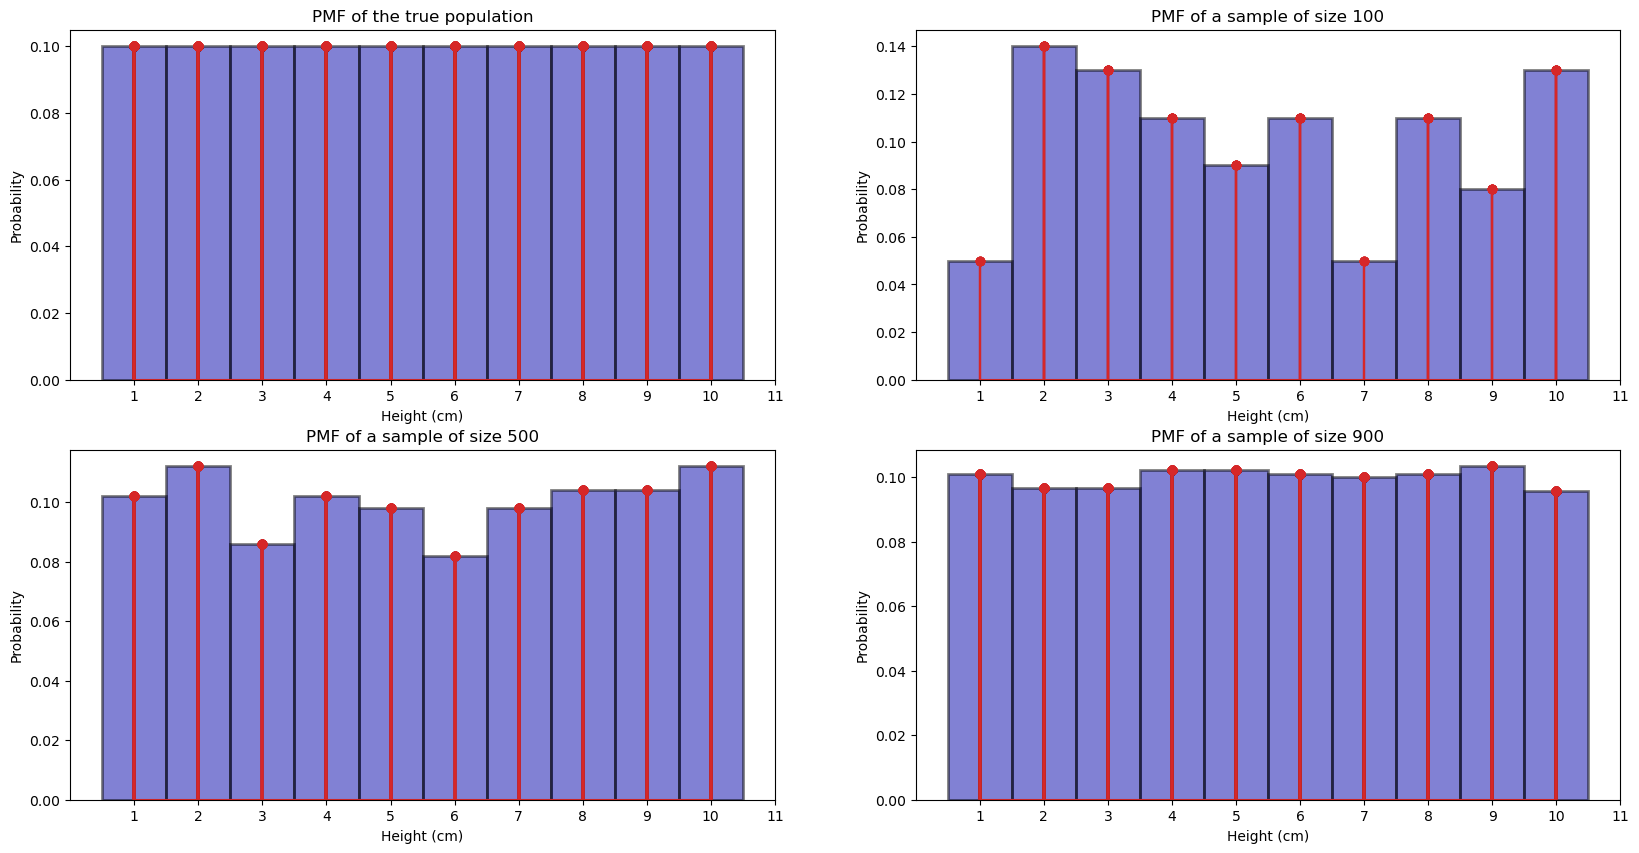

In [12]:
# ideal + empirical
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
bins = np.arange(1, true_population.max() + 1.5) - 0.5
axs[0, 0].hist(
    true_population,
    bins,
    density=True,
    color="#0504AA",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)
axs[0, 0].stem(
    true_population,
    [true_pmf(x, true_population) for x in true_population],
    linefmt="C3-",
    markerfmt="C3o",
    basefmt="C3-",
    use_line_collection=True,
)
axs[0, 0].set_title("PMF of the true population")
axs[0, 0].set_xlabel("Height (cm)")
axs[0, 0].set_ylabel("Probability")
axs[0, 0].set_xticks(bins + 0.5)

axs[0, 1].hist(
    sample_100,
    bins,
    density=True,
    color="#0504AA",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)
axs[0, 1].stem(
    sample_100,
    [empirical_pmf(x, sample_100) for x in sample_100],
    linefmt="C3-",
    markerfmt="C3o",
    basefmt="C3-",
    use_line_collection=True,
)
axs[0, 1].set_title("PMF of a sample of size 100")
axs[0, 1].set_xlabel("Height (cm)")
axs[0, 1].set_ylabel("Probability")
axs[0, 1].set_xticks(bins + 0.5)

axs[1, 0].hist(
    sample_500,
    bins,
    density=True,
    color="#0504AA",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)
axs[1, 0].stem(
    sample_500,
    [empirical_pmf(x, sample_500) for x in sample_500],
    linefmt="C3-",
    markerfmt="C3o",
    basefmt="C3-",
    use_line_collection=True,
)
axs[1, 0].set_title("PMF of a sample of size 500")
axs[1, 0].set_xlabel("Height (cm)")
axs[1, 0].set_ylabel("Probability")
axs[1, 0].set_xticks(bins + 0.5)

axs[1, 1].hist(
    sample_900,
    bins,
    density=True,
    color="#0504AA",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)
axs[1, 1].stem(
    sample_900,
    [empirical_pmf(x, sample_900) for x in sample_900],
    linefmt="C3-",
    markerfmt="C3o",
    basefmt="C3-",
    use_line_collection=True,
)
axs[1, 1].set_title("PMF of a sample of size 900")
axs[1, 1].set_xlabel("Height (cm)")
axs[1, 1].set_ylabel("Probability")
axs[1, 1].set_xticks(bins + 0.5);

- We can tell for the 100 samples, the empiricial histogram is not very close to the true pmf (true distribution).
- We can tell for the 500 samples, the empiricial histogram is a bit closer to the true pmf (true distribution).
- We can tell for the 900 samples, the empiricial histogram is very close to the true pmf (true distribution).

Like what the professor said, if we take a large enough sample, it will be close to the true pmf
this is obvious if we take say 900 out of 1000, then it will be closer to the true pmf
simply because we have more representation across samples. Like
if we only take 100 samples, maybe we a bit unlucky and get only 1 sample of height 5cm, then
that empirical histogram will be very far from the true pmf since the prob of 5 cm in that
example became 1/100 = 0.01! In our case, if check `sorted(sample_100)`, there are only 6 people
with height 9 cm, so our empirical histogram tells us a empirical distribution of only $6/100 = 0.06$
of getting a person with 9 cm, which is very different from 0.1.

In [86]:
def expected_value(population: np.ndarray) -> float:
    """Expected value of the true population."""
    return np.sum(population) / len(population)


def empirical_mean(sample: np.ndarray) -> float:
    """Empirical mean of the sample."""
    return np.sum(sample) / len(sample)


In [87]:
# What is the mean height of the true population (expected value)?
print(f"The expected value of the true population is {expected_value(true_population)}cm.")

The expected value of the true population is 5.5cm.


In [88]:
print(f"The empirical mean of the sample size of 100 is {empirical_mean(sample_100)}cm.")
print(f"The empirical mean of the sample size of 500 is {empirical_mean(sample_500)}cm.")
print(f"The empirical mean of the sample size of 900 is {empirical_mean(sample_900)}cm.")

The empirical mean of the sample size of 100 is 5.38cm.
The empirical mean of the sample size of 500 is 5.392cm.
The empirical mean of the sample size of 900 is 5.541111111111111cm.


The law of averages also make sense once you understood why more samples converge to the true pmf, the idea is the same,
as there are more samples, we get a more accurate representation of the true population, and therefore mean also more accurate.

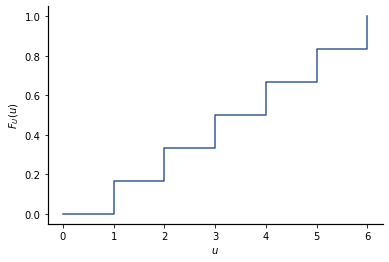

In [18]:
# uvals2 = np.linspace(0, 6, 61)
# plt.step(uvals2, U.cdf(uvals2), where="post")

# plt.xlabel("$u$")
# plt.ylabel("$F_U(u)$");

Finally, let's compare the cumulative histogram (with both `cumulative = True` and `density = True`) to the CDF:

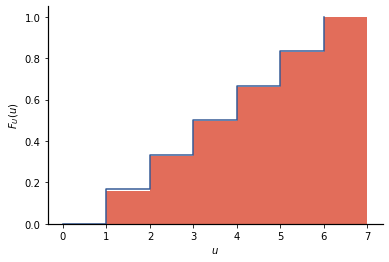

In [19]:
# uvals2 = np.linspace(0, 6, 61)
# plt.step(uvals2, U.cdf(uvals2), where="post")
# plt.hist(u, cumulative=True, density=True, bins=newbins)

# plt.xlabel("$u$")
# plt.ylabel("$F_U(u)$");

**Exercise:** What happens if we plot the cumulative histogram without specifying the bins? Why do you think that happens?